<a href="https://colab.research.google.com/github/willian-silva01/IA/blob/main/Prova_IA_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Primeiras linhas do dataset:


,frequencia,nota_media,bolsista,evadiu
0,78,9.4,1,0
1,91,2.7,0,0
2,68,3.6,1,1
3,54,2.4,0,0
4,82,4.6,0,0



📊 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   frequencia  100 non-null    int64  
 1   nota_media  100 non-null    float64
 2   bolsista    100 non-null    int64  
 3   evadiu      100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None

📈 Estatísticas descritivas:


,frequencia,nota_media,bolsista,evadiu
count,100.000000,100.000000,100.000000,100.000000
mean,70.700000,5.781000,0.540000,0.500000
std,18.472748,2.390118,0.500908,0.502519
min,41.000000,2.000000,0.000000,0.000000
25%,54.750000,3.800000,0.000000,0.000000
50%,69.500000,5.400000,1.000000,0.500000
75%,86.500000,8.125000,1.000000,1.000000
max,100.000000,9.900000,1.000000,1.000000


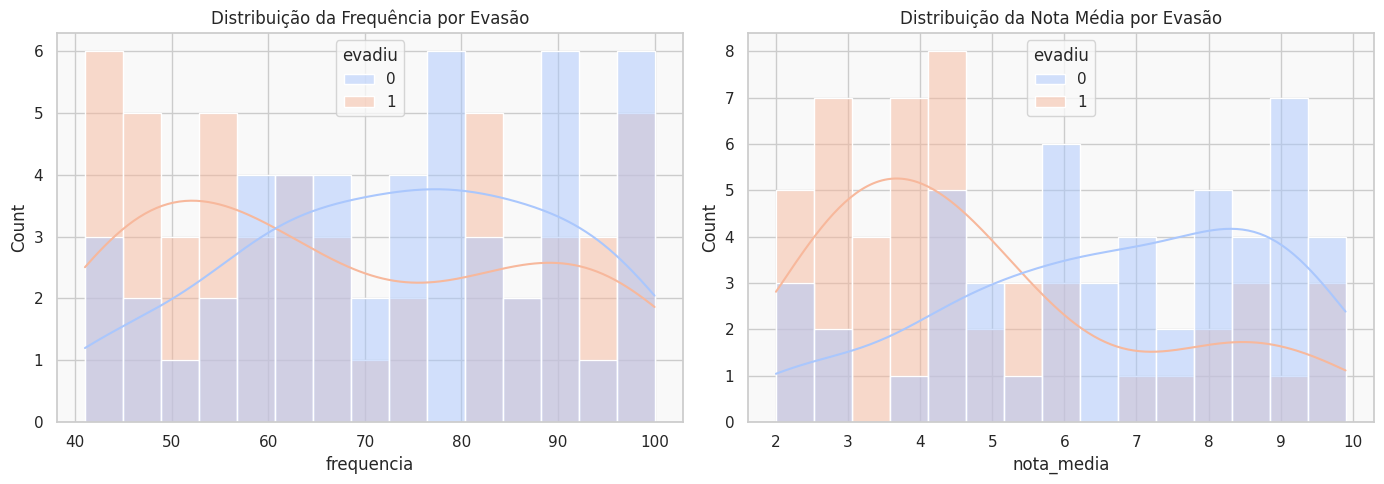

<ipython-input-7-e811cba919c9>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="evadiu", y="frequencia", palette="coolwarm")
<ipython-input-7-e811cba919c9>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="evadiu", y="nota_media", palette="coolwarm")


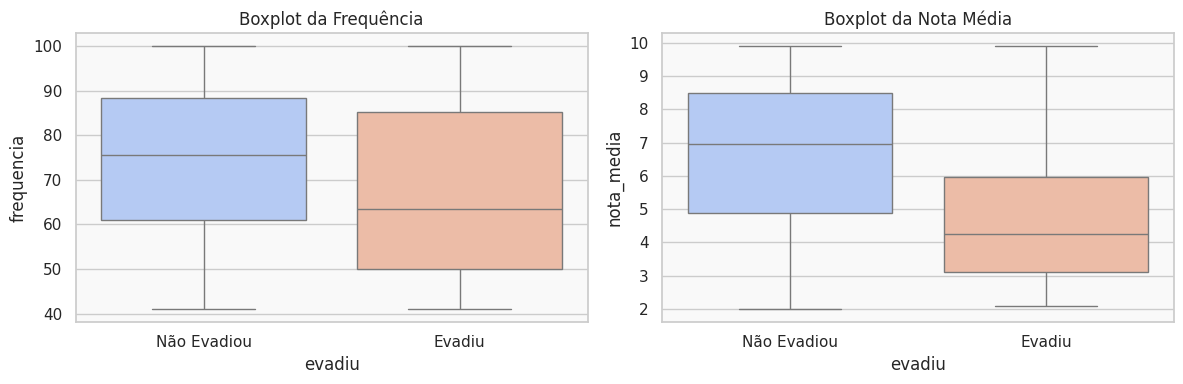

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


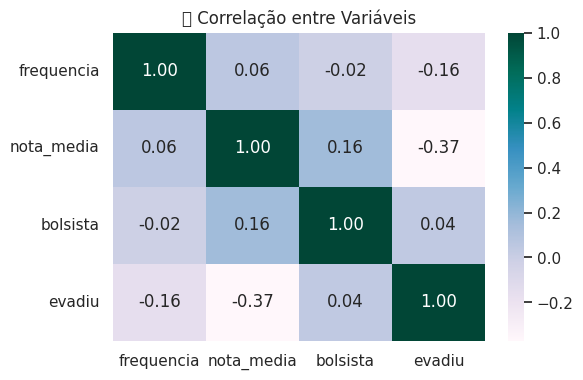

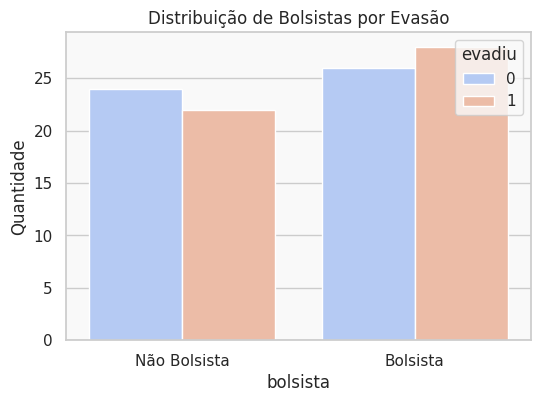



📌 Modelo: Árvore de Decisão
🎯 Acurácia: 63.33%
📋 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.65      0.69      0.67        16

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.63      0.63      0.63        30



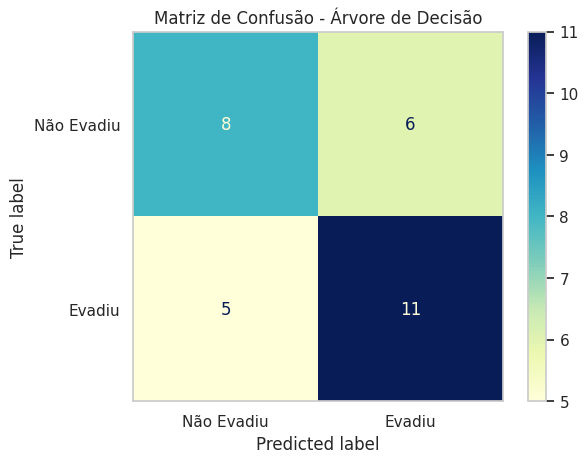



📌 Modelo: Naive Bayes
🎯 Acurácia: 70.00%
📋 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.71      0.75      0.73        16

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



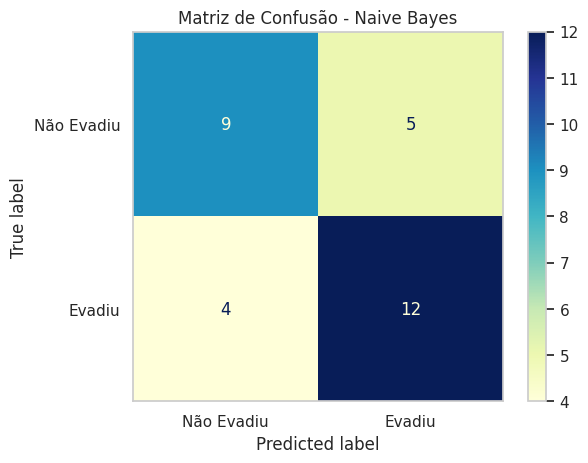



📌 Modelo: KNN
🎯 Acurácia: 66.67%
📋 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.71      0.62      0.67        16

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30



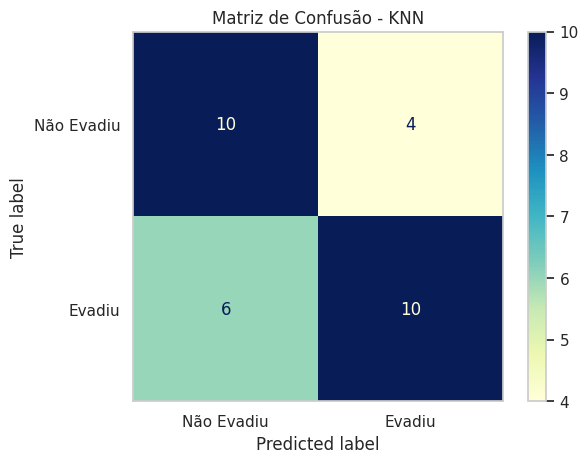

<ipython-input-7-e811cba919c9>:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acuracias, y=nomes, palette="coolwarm")


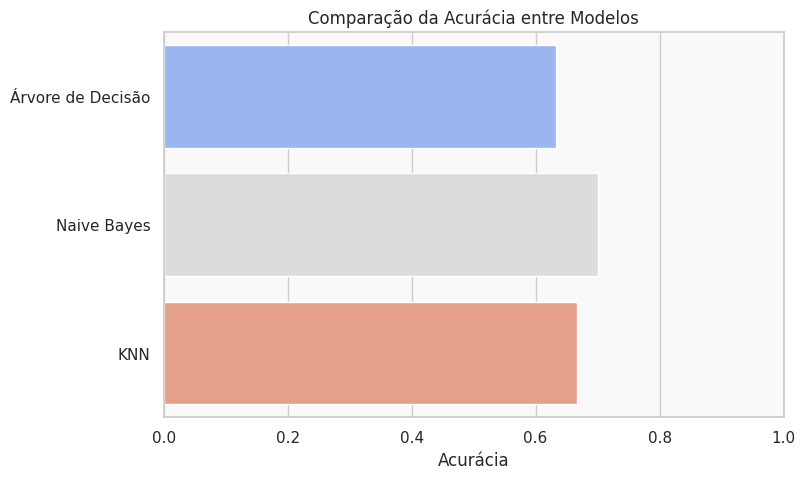

✅ Conclusão baseada nos resultados:
- Árvore de Decisão: Acurácia = 63.33%
- Naive Bayes: Acurácia = 70.00%
- KNN: Acurácia = 66.67%

🏆 Melhor modelo: Naive Bayes com acurácia de 70.00%


In [7]:
# ======================================
# 📘 PROJETO DE CLASSIFICAÇÃO: EVASÃO ESCOLAR
# Modelos: Árvore de Decisão, Naive Bayes e KNN
# ======================================

# 📦 1. IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# 🎨 Estilo de gráficos - deixando mais moderno e colorido
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['axes.facecolor'] = '#f9f9f9'

# ======================================
# 📂 2. CARREGAMENTO E VISUALIZAÇÃO DOS DADOS
# ======================================
df = pd.read_csv("evasao_alunos.csv")

print("🔍 Primeiras linhas do dataset:")
display(df.head())

print("\n📊 Informações gerais:")
print(df.info())

print("\n📈 Estatísticas descritivas:")
display(df.describe())

# ======================================
# 📉 3. ANÁLISE EXPLORATÓRIA DE DADOS
# ======================================
# Histograma com KDE - Frequência e Nota Média
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="frequencia", hue="evadiu", kde=True, bins=15, palette="coolwarm")
plt.title("Distribuição da Frequência por Evasão")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="nota_media", hue="evadiu", kde=True, bins=15, palette="coolwarm")
plt.title("Distribuição da Nota Média por Evasão")

plt.tight_layout()
plt.show()

# Boxplots de Frequência e Nota Média por Evasão
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="evadiu", y="frequencia", palette="coolwarm")
plt.xticks([0, 1], ["Não Evadiou", "Evadiu"])
plt.title("Boxplot da Frequência")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="evadiu", y="nota_media", palette="coolwarm")
plt.xticks([0, 1], ["Não Evadiou", "Evadiu"])
plt.title("Boxplot da Nota Média")

plt.tight_layout()
plt.show()

# Mapa de calor da correlação
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="PuBuGn", fmt=".2f")
plt.title("🔗 Correlação entre Variáveis")
plt.show()

# Adicionando gráfico de barras para distribuição de bolsistas
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="bolsista", hue="evadiu", palette="coolwarm")
plt.xticks([0, 1], ["Não Bolsista", "Bolsista"])
plt.title("Distribuição de Bolsistas por Evasão")
plt.ylabel("Quantidade")
plt.show()

# ======================================
# 🧪 4. PREPARAÇÃO DOS DADOS
# ======================================
X = df.drop("evadiu", axis=1)
y = df["evadiu"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Normalização (apenas para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 🤖 5. TREINAMENTO DOS MODELOS
# ======================================
modelos = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

resultados = {}

for nome, modelo in modelos.items():
    if nome == "KNN":
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    relatorio = classification_report(y_test, y_pred, output_dict=True)

    resultados[nome] = {
        "modelo": modelo,
        "acuracia": acc,
        "matriz_confusao": cm,
        "relatorio": relatorio,
        "y_pred": y_pred
    }

# ======================================
# 📊 6. AVALIAÇÃO DOS MODELOS
# ======================================
for nome, res in resultados.items():
    print(f"\n\n📌 Modelo: {nome}")
    print(f"🎯 Acurácia: {res['acuracia']:.2%}")
    print("📋 Relatório de Classificação:")
    print(classification_report(y_test, res['y_pred']))

    disp = ConfusionMatrixDisplay(confusion_matrix=res["matriz_confusao"], display_labels=["Não Evadiu", "Evadiu"])
    disp.plot(cmap="YlGnBu")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.grid(False)
    plt.show()

# Gráfico de barras comparando acurácia entre os modelos
plt.figure(figsize=(8, 5))
acuracias = [res['acuracia'] for res in resultados.values()]
nomes = list(resultados.keys())
sns.barplot(x=acuracias, y=nomes, palette="coolwarm")
plt.title("Comparação da Acurácia entre Modelos")
plt.xlabel("Acurácia")
plt.xlim(0, 1)
plt.show()

# ======================================
# 🏁 7. CONCLUSÃO
# ======================================
print("✅ Conclusão baseada nos resultados:")

for nome, res in resultados.items():
    print(f"- {nome}: Acurácia = {res['acuracia']:.2%}")

melhor_modelo = max(resultados.items(), key=lambda x: x[1]["acuracia"])
print(f"\n🏆 Melhor modelo: {melhor_modelo[0]} com acurácia de {melhor_modelo[1]['acuracia']:.2%}")

Conclusão:

O modelo Naive Bayes foi o que apresentou melhor desempenho geral, com 70% de acurácia, sendo capaz de identificar corretamente os alunos com risco de evasão com maior eficácia. Ele demonstrou um bom equilíbrio entre sensibilidade (recall) e precisão, o que é essencial quando lidamos com decisões que podem impactar diretamente a vida acadêmica dos alunos.
